# Example: Definition and Use of ERANataf Objects

This example demonstrates how to create a joint distribution object with the ERANataf class and use its methods.

**Developed by:** Sebastian Geyer, Felipe Uribe, Iason Papaioannou, Daniel Straub  
**Assistant Developers:** Luca Sardi, Alexander von Ramm, Matthias Willer, Peter Kaplan  
**Engineering Risk Analysis Group**  
**Technische Universitat Munchen**  
**Version:** 2021-03


## Import Required Libraries


In [ ]:
from eraUQ import ERADist, ERANataf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


## Initialize Random Number Generator


In [2]:
np.random.seed(2021)  # initializing random number generator
n = 5  # number of data points
n_samples = 1000  # number of samples for the plot


## Definition of the ERANataf Object


In [3]:
# definition of the marginal distributions
M = list()
M.append(ERADist('normal', 'PAR', [4, 2]))
M.append(ERADist('gumbel', 'MOM', [1, 2]))
M.append(ERADist('exponential', 'PAR', 4))

# definition of the correlation matrix
Rho = np.array([[1.0, 0.5, 0.5], [0.5, 1.0, 0.5], [0.5, 0.5, 1.0]])

# definition of the joint distribution
T_Nataf = ERANataf(M, Rho)

print("ERANataf object created with 3 marginals:")
print(f"  - Marginal 1: Normal distribution")
print(f"  - Marginal 2: Gumbel distribution")
print(f"  - Marginal 3: Exponential distribution")
print(f"Correlation matrix shape: {Rho.shape}")


ERANataf object created with 3 marginals:
  - Marginal 1: Normal distribution
  - Marginal 2: Gumbel distribution
  - Marginal 3: Exponential distribution
Correlation matrix shape: (3, 3)


## Methods of the ERANataf Class


In [4]:
# generation of n random samples to work with
X = T_Nataf.random(5)

# computation of joint PDF
PDF_X = T_Nataf.pdf(X)

# computation of joint CDF
CDF_X = T_Nataf.cdf(X)

# transformation from physical space X to the standard normal space U and
# Jacobian of the transformation of the first sample
U, Jac_X2U = T_Nataf.X2U(X, 'Jac')

# transformation from standard normal space U to physical space X and
# Jacobian of the transformation of the first sample
X_backtransform, Jac_U2X = T_Nataf.U2X(U, 'Jac')

print("Generated samples X:")
print(X)
print(f"\nJoint PDF values: {PDF_X}")
print(f"\nJoint CDF values: {CDF_X}")
print(f"\nTransformed to standard normal space U:")
print(U)
print(f"\nJacobian X2U: {Jac_X2U}")
print(f"\nBacktransformed X: {X_backtransform}")
print(f"\nJacobian U2X: {Jac_U2X}")


Generated samples X:
[[6.97721811 0.97326285 0.35917877]
 [5.35202174 3.71356177 0.18414571]
 [3.16309726 1.31390306 0.23471028]
 [2.38695837 0.12019563 0.11501447]
 [5.11175166 1.98304235 0.03937255]]

Joint PDF values: [0.01963183 0.02309247 0.06542689 0.14177465 0.03968681]

Joint CDF values: [0.49331799 0.45490837 0.24802496 0.10722904 0.1332159 ]

Transformed to standard normal space U:
[[ 1.48860905 -0.70550429  0.12420684]
 [ 0.67601087  1.13085826 -0.83795346]
 [-0.41845137  0.64500184  0.4090157 ]
 [-0.80652081  0.10641374  0.10275122]
 [ 0.55587583  0.42215483 -1.90772239]]

Jacobian X2U: [[[ 0.5         0.          0.        ]
  [-0.30099493  0.61345967  0.        ]
  [-0.24176335 -0.23116363  3.9454404 ]]

 [[ 0.5         0.          0.        ]
  [-0.30099493  0.39902988  0.        ]
  [-0.24176335 -0.15036228  6.16835128]]

 [[ 0.5         0.          0.        ]
  [-0.30099493  0.57601142  0.        ]
  [-0.24176335 -0.2170524   5.22774465]]

 [[ 0.5         0.          

## Visualization: Samples in Physical and Standard Normal Space



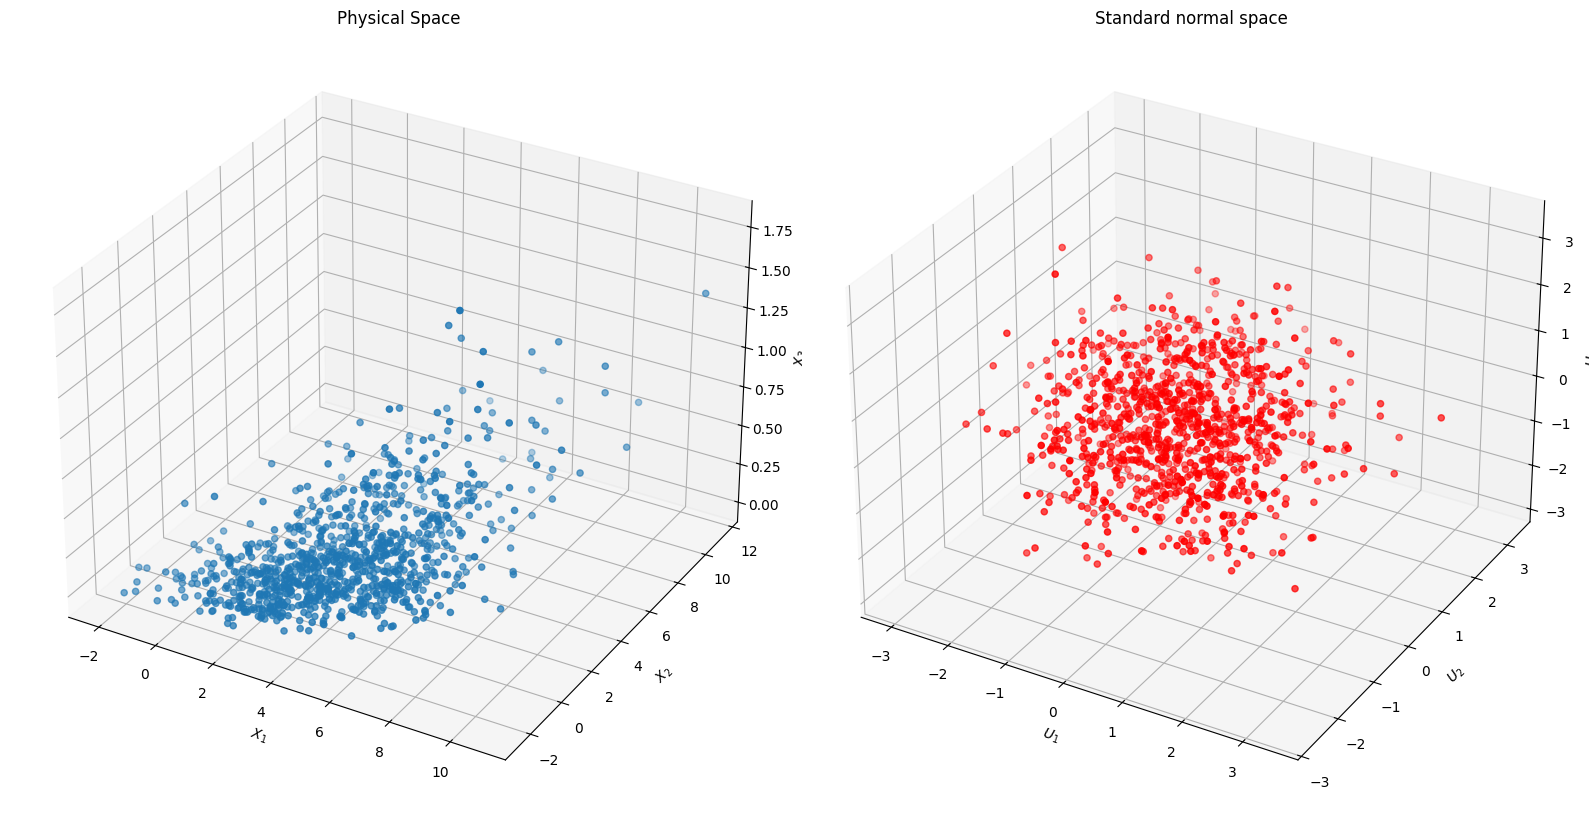

ERANataf example completed!


In [5]:
# generation of n random samples
X_plot = T_Nataf.random(n_samples)
# transformation from physical space X to the standard normal space U
U_plot = T_Nataf.X2U(X_plot)

# plot samples in physical and standard normal space
fig_Samples = plt.figure(figsize=[16, 9])

fig_SamplesAx1 = fig_Samples.add_subplot(121, projection='3d')
fig_SamplesAx1.scatter(X_plot[:, 0], X_plot[:, 1], X_plot[:, 2])
fig_SamplesAx1.set_title('Physical Space')
fig_SamplesAx1.set_xlabel(r'$X_{1}$')
fig_SamplesAx1.set_ylabel(r'$X_{2}$')
fig_SamplesAx1.set_zlabel(r'$X_{3}$')

fig_SamplesAx2 = fig_Samples.add_subplot(122, projection='3d')
fig_SamplesAx2.scatter(U_plot[:, 0], U_plot[:, 1], U_plot[:, 2], color='r')
fig_SamplesAx2.set_title('Standard normal space')
fig_SamplesAx2.set_xlabel(r'$U_{1}$')
fig_SamplesAx2.set_ylabel(r'$U_{2}$')
fig_SamplesAx2.set_zlabel(r'$U_{3}$')

plt.tight_layout()
plt.show()

print("ERANataf example completed!")
